# How to read data from Cloud Storage

This notebook demonstrates how to load a CSV file from Google Cloud Storage with Python.
This notebook uses the [gsutil](https://cloud.google.com/storage/docs/gsutil) command line tool for fetching the data.

There are other very good ways of doing this same thing:

- [Google Python Client](https://github.com/googleapis/google-cloud-python/tree/master/storage)
- [Tensorflow gfile module](https://www.tensorflow.org/api_docs/python/tf/io/gfile)

The use of `gsutil` here is intended to demonstrate a common tool that is useful for working with
data in Cloud Storage in many contexts.

## Setup

In [1]:
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import os

# Enable IPython to display matplotlib graphs.
%matplotlib inline

In [2]:
BILLING_PROJECT_ID = os.environ['GOOGLE_PROJECT']

SAMPLE_INFO_CSV = 'gs://genomics-public-data/1000-genomes/other/sample_info/sample_info.csv'

## Retrieve a CSV

In [3]:
# Use the IPython "!" syntax to call a command-line
file_contents = !gsutil -u {BILLING_PROJECT_ID} cat {SAMPLE_INFO_CSV}

# The "!" syntax returns a special IPython type (IPython.utils.text.SList)
# where each line is a separate item in the list.
# Let's look at the first two lines:
file_contents[0:1]

['"Sample","Family_ID","Population","Population_Description","Gender","Relationship","Unexpected_Parent_Child","Non_Paternity","Siblings","Grandparents","Avuncular","Half_Siblings","Unknown_Second_Order","Third_Order","In_Low_Coverage_Pilot","LC_Pilot_Platforms","LC_Pilot_Centers","In_High_Coverage_Pilot","HC_Pilot_Platforms","HC_Pilot_Centers","In_Exon_Targetted_Pilot","ET_Pilot_Platforms","ET_Pilot_Centers","Has_Sequence_in_Phase1","Phase1_LC_Platform","Phase1_LC_Centers","Phase1_E_Platform","Phase1_E_Centers","In_Phase1_Integrated_Variant_Set","Has_Phase1_chrY_SNPS","Has_phase1_chrY_Deletions","Has_phase1_chrMT_SNPs","Main_project_LC_Centers","Main_project_LC_platform","Total_LC_Sequence","LC_Non_Duplicated_Aligned_Coverage","Main_Project_E_Centers","Main_Project_E_Platform","Total_Exome_Sequence","X_Targets_Covered_to_20x_or_greater","VerifyBam_E_Omni_Free","VerifyBam_E_Affy_Free","VerifyBam_E_Omni_Chip","VerifyBam_E_Affy_Chip","VerifyBam_LC_Omni_Free","VerifyBam_LC_Affy_Free","Ver

In [4]:
# We are interested in loading this into a dataframe, so we need to convert it to a single string
sample_info = pd.read_csv(StringIO('\n'.join(file_contents)), engine='python')

In [5]:
# Let's see the structure of what we loaded
sample_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sample                               3500 non-null   object 
 1   Family_ID                            3500 non-null   object 
 2   Population                           3500 non-null   object 
 3   Population_Description               3500 non-null   object 
 4   Gender                               3500 non-null   object 
 5   Relationship                         2590 non-null   object 
 6   Unexpected_Parent_Child              43 non-null     object 
 7   Non_Paternity                        8 non-null      object 
 8   Siblings                             68 non-null     object 
 9   Grandparents                         10 non-null     object 
 10  Avuncular                            46 non-null     object 
 11  Half_Siblings                 

In [6]:
sample_info.head()

,Sample,Family_ID,Population,Population_Description,Gender,Relationship,Unexpected_Parent_Child,Non_Paternity,Siblings,Grandparents,...,In_Final_Phase_Variant_Calling,Has_Omni_Genotypes,Has_Axiom_Genotypes,Has_Affy_6_0_Genotypes,Has_Exome_LOF_Genotypes,EBV_Coverage,DNA_Source_from_Coriell,Has_Sequence_from_Blood_in_Index,Super_Population,Super_Population_Description
0,HG00096,HG00096,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,20.31,NaN,NaN,EUR,European
1,HG00097,HG00097,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,169.49,NaN,NaN,EUR,European
2,HG00098,HG00098,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,EUR,European
3,HG00099,HG00099,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,23.04,NaN,NaN,EUR,European
4,HG00100,HG00100,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,116.22,NaN,NaN,EUR,European


In [7]:
# Pandas can give us some summary analysis of the numeric fields
sample_info.describe()

,In_Low_Coverage_Pilot,In_High_Coverage_Pilot,In_Exon_Targetted_Pilot,Has_Sequence_in_Phase1,In_Phase1_Integrated_Variant_Set,Has_Phase1_chrY_SNPS,Has_phase1_chrY_Deletions,Has_phase1_chrMT_SNPs,Total_LC_Sequence,LC_Non_Duplicated_Aligned_Coverage,...,E_Indel_Ratio,LC_Passed_QC,E_Passed_QC,In_Final_Phase_Variant_Calling,Has_Omni_Genotypes,Has_Axiom_Genotypes,Has_Affy_6_0_Genotypes,Has_Exome_LOF_Genotypes,EBV_Coverage,Has_Sequence_from_Blood_in_Index
count,179.0,6.0,508.0,1182.0,1092.0,525.0,456.0,1074.0,2.688000e+03,2558.000000,...,2682.000000,2558.0,2551.0,2535.0,2098.0,977.0,1195.0,2063.0,2560.000000,104.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.346226e+10,7.600297,...,0.982808,1.0,1.0,1.0,1.0,1.0,1.0,1.0,164.641910,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.383855e+09,2.806758,...,0.364942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.373246,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.806729e+09,3.020000,...,0.590000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.710115e+10,5.650000,...,0.820000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.735000,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.159963e+10,7.155000,...,0.880000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,90.435000,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.715061e+10,8.980000,...,1.020000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,197.735000,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.390000e+11,40.280000,...,6.530000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5749.410000,1.0


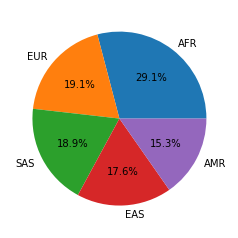

In [8]:
counts_by_super = sample_info['Super_Population'].value_counts()
plt.pie(counts_by_super.values, labels=counts_by_super.index, autopct="%1.1f%%")
plt.show()

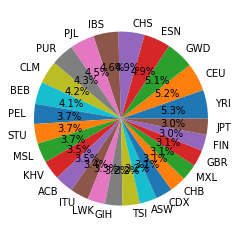

In [9]:
counts_by_population = sample_info['Population'].value_counts()
plt.pie(counts_by_population.values, labels=counts_by_population.index, autopct="%1.1f%%")
plt.show()

# Provenance

In [10]:
import datetime
print(datetime.datetime.now())

2020-07-27 20:19:30.722924


In [11]:
!pip3 freeze

absl-py==0.9.0
arrow==0.15.7
asn1crypto==0.24.0
astor==0.8.1
astroid==2.4.2
astropy==4.0.1.post1
attrs==19.3.0
backcall==0.2.0
bagit==1.7.0
bgzip==0.3.5
binaryornot==0.4.4
biopython==1.72
bleach==3.1.5
bokeh==1.0.0
brewer2mpl==1.4.1
bx-python==0.8.2
CacheControl==0.11.7
cachetools==4.1.0
certifi==2020.6.20
chardet==3.0.4
cli-builder==0.0.1
click==7.1.2
confuse==1.1.0
cookiecutter==1.7.2
cryptography==2.1.4
cwltool==1.0.20190228155703
cycler==0.10.0
Cython==0.29.20
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
enum34==1.1.6
fastinterval==0.1.1
firecloud==0.16.25
future==0.18.2
gast==0.3.3
ggplot==0.11.5
google-api-core==1.21.0
google-auth==1.18.0
google-auth-oauthlib==0.4.1
google-cloud-bigquery==1.23.1
google-cloud-bigquery-datatransfer==0.4.1
google-cloud-core==1.3.0
google-cloud-datastore==1.10.0
google-cloud-resource-manager==0.30.0
google-cloud-storage==1.29.0
google-pasta==0.2.0
google-resumable-media==0.5.1
googleapis-common-protos==1.52.0
grpcio==1.30.0
gs-chunked-io==0.3.

Copyright 2018 The Broad Institute, Inc., Verily Life Sciences, LLC All rights reserved.

This software may be modified and distributed under the terms of the BSD license. See the LICENSE file for details.